# 전산물리 기말프로젝트

# 요약
- 이미지 인식을 주제로 기말프로젝트를 진행함
- 0~9 숫자 이미지 데이터를 활용해 머신러닝 기법(4개), 딥러닝 기법(1개)을 적용해 총 5가지 모델을 학습시키고 정확도로 결과를 확인함

- 1. 데이터 불러오기
    - tensorflow module의 mnist 데이터 활용
    - 28 X 28 이미지 데이터
    - 60,000개의 학습 데이터와 10,000개의 시험 데이터로 이뤄짐
    
- 2. 데이터 탐색
    - 0 ~ 255 값을 가지고 있어 각 값을 255로 나누어 0 ~ 1로 스케일링 하기로 함
    - 0~9 숫자 이미지가 고르게 분포함을 확인
    
- 3. 모형 적합
    - 머신러닝
            1) RandomForest
            2) Kneighbors
            3) Multinomial Logistic Regression
            4) Support Vector Machine(SVM(
    - 딥러닝
            1) CNN(Convolutional Neural Network)
- 4. 모형 선정
    - 10,000개의 시험데이터 예측 결과로 계산한 정확도를 활용해 모형 평가
    - 딥러닝 기법인 CNN이 가장 좋은 결과 (99.46%)
    - 머신러닝 중에서는 SVM이 가장 좋은 결과 (97.92%)

# 이미지 인식
활용 데이터 : MNIST

### 1. 데이터 불러오기

In [67]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [68]:
# 데이터 shape 확인
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')

x_train : (60000, 28, 28), y_train : (60000,)
x_test : (10000, 28, 28), y_test : (10000,)


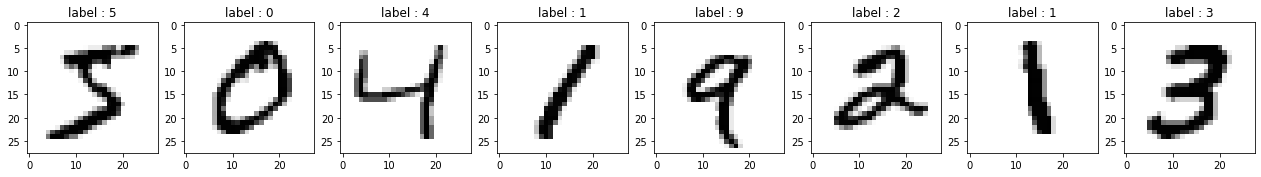

In [69]:
# 데이터 확인
import numpy as np
import matplotlib.pyplot as plt

# 훈련데이터 및 라벨 확인
def show_grid_images(image_num_list, ncols=8, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = x_train[image_num_list[i]]
        axs[i].imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
        axs[i].set_title(f'label : {y_train[image_num_list[i]]}')  
show_grid_images(np.arange(8))

# 2. 데이터 탐색

In [20]:
# 데이터 min/max 확인
print(f'min_value : {x_train[0].min()}, max_value : {x_train[0].max()}')

# -> 스케일링 필요성 확인

min_value : 0, max_value : 255


In [21]:
# label 분포 확인
import pandas as pd
pd.DataFrame(y_train, columns=['label']).reset_index().groupby('label').count()

# -> 라벨 5가 5,421개로 최소 표본 / 라벨 1이 6,742개로 최대 표본을 가지고 있음
# -> 라벨 분포가 유사하므로 imbalance 하지 않음

,index
label,
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851


# 3. 모형 적합

## - 머신러닝
1) 28X28 데이터를 784(28X28)로 Flatten해 784개의 feature를 가지고 있는 데이터 셋으로 간주

2) 4가지 머신러닝 모델을 적합(randomforest, kneighbors, multinomial logistic regression, svm)

In [22]:
# 1) 28X28 데이터를 784(28X28)로 Flatten해 784개의 feature를 가지고 있는 데이터 셋으로 간주
# 데이터 정규화
x_train = x_train/255.0

# one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

# x_train flatten
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])

In [23]:
# 데이터 shape 확인
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')

x_train : (60000, 784), y_train : (60000, 10)


In [24]:
# 2) 4가지 머신러닝 모델을 적합
import joblib

# RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
# 모형 저장
joblib.dump(rf_model, './rf_model.pkl')
rf_model = joblib.load('./rf_model.pkl') 


# KNeighbors
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier()
kn_model.fit(x_train, y_train)
# 모형 저장
joblib.dump(kn_model, './kn_model.pkl')
kn_model = joblib.load('./kn_model.pkl') 


# 다항로지스틱회귀분석
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class = "multinomial", solver = "lbfgs")
# 다항로지스틱은 원핫인코딩 하지 않음
lr_model.fit(x_train, np.argmax(y_train, axis=1))
# 모형 저장
joblib.dump(lr_model, './lr_model.pkl')
lr_model = joblib.load('./lr_model.pkl') 


# SVM
from sklearn import svm
svm_model = svm.SVC()
# SVM은 원핫인코딩 하지 않음
svm_model.fit(x_train, np.argmax(y_train, axis=1))
# 모형 저장
joblib.dump(svm_model, './svm_model.pkl')
svm_model = joblib.load('./svm_model.pkl') 

C:\Users\차정윤\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## - 딥러닝
- 이미지인식에 특화된 딥러닝 모델(CNN) 활용

In [29]:
# CNN
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D , Dropout , Flatten , Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)
train_images = train_images/255.0

IMAGE_SIZE = 28 # mnist 이미지 사이즈
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

# 모델 구축
x = Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size = (3,3), padding = 'same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size = (3,3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = 2)(x)

x = Conv2D(filters=128, kernel_size = (3,3), padding='same', activation='relu' )(x)
x = Conv2D(filters=128, kernel_size = (3,3), padding='same', activation='relu' )(x)
x = MaxPooling2D(pool_size = 2)(x)

# mnist의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

cnn_model = Model(inputs=input_tensor, outputs=output)

cnn_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 64)        0   

In [30]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이 아니므로 loss는 sparse_categorical_crossentropy
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# 모델 적합 (모델 구축에 의의가 있으므르 epochs는 10으로 설정.)
# epochs가 적기 때문에 오버피팅 가능성은 배제(earlystopping이나 learning rate 조정 하지 않음)
# val_acc를 확인해보면 감소하지 않기 때문에 오버피팅 되지 않았다고 판단
cnn_model.fit(x=train_images, y=train_labels, batch_size=512, epochs=10, validation_split=0.15 ) # validation 15%

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 118s 2ms/sample - loss: 0.4775 - acc: 0.8419 - val_loss: 0.0646 - val_acc: 0.9814
Epoch 2/10
51000/51000 [==============================] - 111s 2ms/sample - loss: 0.0880 - acc: 0.9724 - val_loss: 0.0471 - val_acc: 0.9857
Epoch 3/10
51000/51000 [==============================] - 113s 2ms/sample - loss: 0.0584 - acc: 0.9819 - val_loss: 0.0364 - val_acc: 0.9906
Epoch 4/10
51000/51000 [==============================] - 130s 3ms/sample - loss: 0.0458 - acc: 0.9860 - val_loss: 0.0283 - val_acc: 0.9921
Epoch 5/10
51000/51000 [==============================] - 112s 2ms/sample - loss: 0.0367 - acc: 0.9888 - val_loss: 0.0289 - val_acc: 0.9916
Epoch 6/10
51000/51000 [==============================] - 115s 2ms/sample - loss: 0.0315 - acc: 0.9897 - val_loss: 0.0254 - val_acc: 0.9933
Epoch 7/10
51000/51000 [==============================] - 112s 2ms/sample - loss: 0.0278 - acc: 0.9912 - val_lo

In [32]:
# 모델 저장
cnn_model.save('./cnn_model')
cnn_model = load_model("./cnn_model")

W1219 21:38:47.094855 29956 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1219 21:38:47.095882 29956 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# 4. 모형 선정
- 제일 좋은 성능의 모형 선택

In [33]:
# 3) 제일 좋은 성능의 모형 선택
# 성능평가
# ML
# 성능평가를 위한 테스트 데이터 전처리
x_test = x_test/255.0

# one-hot encoding
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test) # one-hot encoding

# x_test flatten
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])


# DL
# 성능평가를 위한 테스트 데이터 전처리
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2],1)
test_images = test_images/255.0

In [34]:
# 모델 파일 불러오기
import glob
ml_model = glob.glob('./*model.pkl')
dl_model = ['./cnn_model']

In [95]:
# 모델 파일 확인
ml_model, dl_model

(['.\\kn_model.pkl', '.\\lr_model.pkl', '.\\rf_model.pkl', '.\\svm_model.pkl'],
 ['./cnn_model'])

In [49]:
# test 데이터 적용 및 정확도 저장
from sklearn.metrics import accuracy_score
result = pd.DataFrame(index=range(0))

# 머신러닝(ML)
for model_file_nm in ml_model :
    model = joblib.load(model_file_nm) # 모델 불러오기
    pred = model.predict(x_test) # 예측
    if 'lr' in model_file_nm or 'svm' in model_file_nm :
        score = accuracy_score(pred, np.argmax(y_test, axis=1)) # 스코어 산출
    else :
    
        score = accuracy_score(pred, y_test) # 스코어 산출
    result = pd.concat([result,pd.DataFrame([[model_file_nm,score]])]) # 결과 저장
    
# 딥러닝(DL)
for model_file_nm in dl_model :
    model = load_model(model_file_nm) # 모델 불러오기
    score = model.evaluate(test_images, test_labels)[1] # 스코어 산출
    result =  pd.concat([result,pd.DataFrame([[model_file_nm,score]])]) # 결과 저장

10000/10000 [==============================] - 8s 833us/sample - loss: 0.0171 - acc: 0.9946


In [52]:
# 결과 확인 및 accuracy_score로 정렬
result.columns = ['model', 'accuracy_score']
result.sort_values('accuracy_score', ascending=False).reset_index(drop=True)
# 딥러닝 모델이 가장 좋은 정확도를 보였고 머신러닝 중에서는 SVM이 가장 좋은 정확도를 보임

,model,accuracy_score
0,./cnn_model,0.9946
1,.\svm_model.pkl,0.9792
2,.\kn_model.pkl,0.9660
3,.\lr_model.pkl,0.9258
4,.\rf_model.pkl,0.9007


In [ ]:
# 참고
# 머신러닝을 활용한 이미지 인식의 경우 이미지 데이터의 픽셀값들이 아닌 이미지의 특성(가령 사람 이미지라면 눈의 크기, 코의 크기, 눈과 눈 사이 거리 등 사람을 특정 지을 수 있는 속성)을 활용하는 것으로 알고 있음
# 본 프로젝트는 강의록을 참고해 진행했으므로 28X28 데이터를 784 array로 바꾸어 머신러닝 기법을 적용해보았음
# 또한 mnist 데이터는 숫자가 전체 이미지 정가운데 있어 픽셀값들로도 충분히 학습이 가능하다고 생각됨
# 추가로 이미지 인식에 특화된 딥러닝 모델에 관해 구글을 통해 학습하고 모델을 구축해봄